## Rate plots down currents. Several iterations with final rate+CI error bar plots at the bottom

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

OUTPATH = './output'
IOPATH = '/ocean/rbeutel/MOAD/analysis-becca/Synthesis/data/CCS_obs.csv'

## Loading Data and Indicators

In [3]:
obs = pd.read_csv(IOPATH)
for col, count in obs.count().items():
    print(f"{col}: {count} non-NaN values")
obs

Unnamed: 0.1: 1754141 non-NaN values
Unnamed: 0: 1754141 non-NaN values
time: 1754141 non-NaN values
longitude (degrees_east): 1754141 non-NaN values
latitude (degrees_north): 1754141 non-NaN values
depth (m): 1754141 non-NaN values
pressure (dbar): 1754141 non-NaN values
temperature (degC): 1531420 non-NaN values
salinity (g kg-1): 1754141 non-NaN values
density (kg m-3): 1531420 non-NaN values
spice: 1531420 non-NaN values
sigma0 (kg m-3): 1531420 non-NaN values
DO (umol kg-1): 971518 non-NaN values
NO3 (uM): 392326 non-NaN values
NO2 (uM): 343810 non-NaN values
NH4 (uM): 5179 non-NaN values
Nstar (umol kg-1): 383614 non-NaN values
PO4 (uM): 437924 non-NaN values
SiO4 (uM): 53939 non-NaN values
Chl (mg m-3): 35093 non-NaN values
TA (uM): 8214 non-NaN values
DIC (uM): 8201 non-NaN values
Carbonate: 2359 non-NaN values
Aragonite: 7076 non-NaN values
Calcite: 7076 non-NaN values
Cd (nmol kg-1): 229 non-NaN values
Co (nmol kg-1): 225 non-NaN values
Cu (nmol kg-1): 364 non-NaN values
Fe (

,Unnamed: 0.1,Unnamed: 0,time,longitude (degrees_east),latitude (degrees_north),depth (m),pressure (dbar),temperature (degC),salinity (g kg-1),density (kg m-3),...,Ni (nmol kg-1),Zn (nmol kg-1),source,current,location,[TA-DIC] (uM),year,month,NSdist,EWdist
0,0,0,1933-07-25 00:00:00+00:00,-126.76,49.34,1.0,1.008587,NaN,32.070847,NaN,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,0.000000,-0.0
1,1,1,1933-07-25 00:00:00+00:00,-126.76,49.34,2.0,2.017180,NaN,32.090943,NaN,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,0.000000,-0.0
2,2,2,1933-07-25 00:00:00+00:00,-126.76,49.34,4.0,4.034378,NaN,32.090906,NaN,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,0.000000,-0.0
3,3,3,1933-07-25 00:00:00+00:00,-126.76,49.34,6.0,6.051598,NaN,32.090870,NaN,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,0.000000,-0.0
4,4,4,1933-07-25 00:00:00+00:00,-126.76,49.34,10.0,10.086095,NaN,32.181305,NaN,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,0.000000,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754136,1754136,1841132,2024-11-18 00:00:00+00:00,-124.95,44.38,0.0,0.000000,12.713836,32.386146,1024.310554,...,NaN,NaN,ooi,NaN,slope,NaN,2024,11,484.541716,NaN
1754137,1754137,1841133,2024-11-18 00:00:00+00:00,-124.94,44.36,0.0,0.000000,12.712860,32.386131,1024.310730,...,NaN,NaN,ooi,NaN,slope,NaN,2024,11,484.541716,NaN
1754138,1754138,1841134,2024-11-18 00:00:00+00:00,-124.57,46.99,0.0,0.000000,10.586080,32.728763,1024.962773,...,NaN,NaN,ooi,shelf,shelf,NaN,2024,11,215.824564,-0.0
1754139,1754139,1841135,2024-11-18 00:00:00+00:00,-124.56,46.99,0.0,0.000000,12.215222,32.245641,1024.296804,...,NaN,NaN,ooi,shelf,shelf,NaN,2024,11,215.824564,-0.0


In [4]:
# reduce potential bias caused by sampling programs going out in different months
# summer only (april-sep inclusive) based on PreliminaryCurrentAnalysis.ipynb
obs = obs[(obs.month>=4)&(obs.month<=9)]
obs

,Unnamed: 0.1,Unnamed: 0,time,longitude (degrees_east),latitude (degrees_north),depth (m),pressure (dbar),temperature (degC),salinity (g kg-1),density (kg m-3),...,Ni (nmol kg-1),Zn (nmol kg-1),source,current,location,[TA-DIC] (uM),year,month,NSdist,EWdist
0,0,0,1933-07-25 00:00:00+00:00,-126.76,49.34,1.0,1.008587,NaN,32.070847,NaN,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,0.000000,-0.0
1,1,1,1933-07-25 00:00:00+00:00,-126.76,49.34,2.0,2.017180,NaN,32.090943,NaN,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,0.000000,-0.0
2,2,2,1933-07-25 00:00:00+00:00,-126.76,49.34,4.0,4.034378,NaN,32.090906,NaN,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,0.000000,-0.0
3,3,3,1933-07-25 00:00:00+00:00,-126.76,49.34,6.0,6.051598,NaN,32.090870,NaN,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,0.000000,-0.0
4,4,4,1933-07-25 00:00:00+00:00,-126.76,49.34,10.0,10.086095,NaN,32.181305,NaN,...,NaN,NaN,ios bottle,shelf,shelf,NaN,1933,7,0.000000,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753568,1753568,1840531,2024-09-30 00:00:00+00:00,-124.57,46.99,0.0,0.000000,10.000050,33.328536,1025.527358,...,NaN,NaN,ooi,shelf,shelf,NaN,2024,9,215.824564,-0.0
1753569,1753569,1840532,2024-09-30 00:00:00+00:00,-124.56,46.99,0.0,0.000000,12.388119,32.661681,1024.585241,...,NaN,NaN,ooi,shelf,shelf,NaN,2024,9,215.824564,-0.0
1753570,1753570,1840533,2024-09-30 00:00:00+00:00,-124.31,44.64,0.0,0.000000,9.441516,33.522238,1025.769626,...,NaN,NaN,ooi,shelf,shelf,NaN,2024,9,446.476618,NaN
1753571,1753571,1840534,2024-09-30 00:00:00+00:00,-124.27,47.13,0.0,0.000000,11.669242,32.555657,1024.637082,...,NaN,NaN,ooi,shelf,shelf,NaN,2024,9,215.824564,-0.0


In [5]:
# Setting up different currents
obs_shelf = obs[obs['current'] == 'shelf']
obs_cuc = obs[obs['current'] == 'CUC']
obs_cc = obs[obs['current'] == 'CC']

In [6]:
# make a 'dist' column of the distances we're actually going to use for each current
# for shelf and cuc its simply the NS dist

obs_cuc['dist'] = obs_cuc.NSdist
obs_shelf['dist'] = obs_shelf.NSdist

# for the CC its a bit more complicated
# first, just pick whatever line the point is closer to
abs_a = obs_cc.NSdist.abs()
abs_b = obs_cc.EWdist.abs()

obs_cc['dist'] = np.select(
    [
        abs_a < abs_b,       # a closer to zero
        abs_b < abs_a,       # b closer to zero
        abs_a.isna(),        # a NaN, take b
        abs_b.isna()         # b NaN, take a
    ],
    [
        obs_cc.NSdist,
        obs_cc.EWdist,
        obs_cc.EWdist,
        obs_cc.NSdist
    ],
    default=np.nan
)

# and then also default that anywhere that the NS dist is -ve, the EW distance should be taken
obs_cc.dist[obs_cc.NSdist < 0] = obs_cc.EWdist

## Figures

In [7]:
def plot_ratediff_NS_CI(var_string, current_string, subplot_pos,
                        n_bins=9, cov_type="HAC", hac_maxlags=1,
                        annual_stat="median", min_obs_per_year=3,
                        min_years=4, min_span_years=10):
    # pick data by current
    if current_string == 'CUC':
        obs_used = obs_cuc
    elif current_string == 'Shelf_Current':
        obs_used = obs_shelf
    elif current_string == 'CC':
        obs_used = obs_cc
    else:
        raise ValueError("Invalid current_string. Use 'CC', 'CUC', or 'Shelf_Current'.")

    ylim_dict = {'spice':[-0.3,0.04], 'temperature (degC)': [-0.5,0.2],
                 'salinity (g kg-1)':[-0.28,0.05], 'DO (umol kg-1)':[-3,3.5],
                 'NO3 (uM)':[-2.3,1.8], '[TA-DIC] (uM)':[-10,17]}

    # bin edges/centers/widths
    dist = np.asarray(obs_used['dist'])
    dmin, dmax = np.nanmin(dist), np.nanmax(dist)
    edges   = np.linspace(dmin, dmax, n_bins+1)
    centers = 0.5 * (edges[:-1] + edges[1:])
    # keep your "narrow bar" choice but ensure width is positive
    widths  = np.maximum((edges[1:] - edges[:-1]) - 200, 1e-6)

    slopes      = np.full(n_bins, np.nan)
    lo95        = np.full(n_bins, np.nan)
    hi95        = np.full(n_bins, np.nan)
    year_span   = np.full(n_bins, np.nan)   # NaN => excluded
    n_years_arr = np.full(n_bins, np.nan)

    years_all = np.asarray(obs_used['year'])
    y_all     = np.asarray(obs_used[var_string])

    for i in range(n_bins):
        lo, hi = edges[i], edges[i+1]
        msk = (dist >= lo) & (dist < hi) & np.isfinite(years_all) & np.isfinite(y_all)
        if not np.any(msk):
            continue

        # (1) aggregate to annual values with ≥ min_obs_per_year
        df_bin = pd.DataFrame({
            "year": years_all[msk].astype(float),
            "val":  y_all[msk].astype(float)
        })

        # distinct years and span
        n_years = len(set(df_bin["year"]))
        span = float(df_bin["year"].max() - df_bin["year"].min() + 1)

        if (n_years < min_years) or (span < min_span_years):
            # exclude this bin from both points and bars
            continue

        grp = df_bin.groupby("year", as_index=False).agg(
            n=("val", "size"),
            med=("val", "median"),
            mean=("val", "mean")
        )
        grp = grp[grp["n"] >= min_obs_per_year]
        if grp.empty:
            continue

        n_years_arr[i] = n_years
        year_span[i]   = span

        Y_ann = grp["med"].values if annual_stat == "median" else grp["mean"].values
        X_ann = grp["year"].values

        # (2) OLS with equal weight per year + (3) robust SEs
        X = sm.add_constant(X_ann)
        ols = sm.OLS(Y_ann, X)
        if cov_type == "HAC":
            res = ols.fit(cov_type="HAC", cov_kwds={"maxlags": int(hac_maxlags)})
        else:
            res = ols.fit(cov_type=cov_type)

        slopes[i] = res.params[1]
        ci = res.conf_int(alpha=0.05)
        if ci.shape[0] > 1:
            lo95[i], hi95[i] = ci[1, 0], ci[1, 1]

    # === plotting ===
    ax_tr = ax[subplot_pos]
    ax_yr = ax_tr.twinx()

    # Only plot bars for bins that passed filters
    m_bar = np.isfinite(year_span)
    if np.any(m_bar):
        ax_yr.bar(centers[m_bar], year_span[m_bar], width=widths[m_bar],
                  color='lightblue', alpha=0.7, zorder=1)
    ax_yr.set_ylabel('Span of years present (yr)')
    ax_yr.set_ylim([0,100])
    ax_yr.grid(axis='y',color='w',zorder=2)

    # points + 95% CI for valid bins only
    m_ok = np.isfinite(slopes) & np.isfinite(lo95) & np.isfinite(hi95)
    if np.any(m_ok):
        yerr = np.vstack([hi95[m_ok] - slopes[m_ok], slopes[m_ok] - lo95[m_ok]])
        ax_tr.errorbar(centers[m_ok], slopes[m_ok], yerr=yerr, fmt='.', ms=7,
                       c='darkblue', label='95% CI',zorder=4)

    ax_tr.set_xlim(dmin - 0.05*(dmax-dmin), dmax + 0.05*(dmax-dmin))
    ax_tr.set_xlabel('Distance Along Line (km)')
    if var_string == 'spice':
        ax_tr.set_ylabel('Rate of Change: Spice (kg m$^{-3}$ yr$^{-1}$)')
    else:
        ax_tr.set_ylabel(f"Rate of Change: {var_string} per year")

    ax_tr.set_title(f'{var_string} trend by distance bin ({current_string})')
    # ax_tr.grid(True, alpha=0.3)
    ax_tr.axhline(0, color='black', lw=1,zorder=3)

    if var_string in ylim_dict:
        ax_tr.set_ylim(ylim_dict[var_string])

    # add lines for JdF, Cape Mendocino, and Point Conception
    ax_tr.plot([0,0],[-1000,1000],'k--',alpha=0.5) # JdF
    ax_tr.plot([900,900],[-1000,1000],'k--',alpha=0.5) # Cape Mendocino
    ax_tr.plot([1675,1675],[-1000,1000],'k--',alpha=0.5) # Point Conception
    if current_string == 'CUC':
        ax_tr.text(0.18,0.02,'JdF',ha='right',va='bottom',transform=ax[subplot_pos].transAxes,fontsize=10)
        ax_tr.text(0.46,0.02,'CM',ha='right',va='bottom',transform=ax[subplot_pos].transAxes,fontsize=10)
        ax_tr.text(0.70,0.02,'PC',ha='right',va='bottom',transform=ax[subplot_pos].transAxes,fontsize=10)
    else:
        ax_tr.text(0.33,0.02,'JdF',ha='right',va='bottom',transform=ax[subplot_pos].transAxes,fontsize=10)
        ax_tr.text(0.55,0.02,'CM',ha='right',va='bottom',transform=ax[subplot_pos].transAxes,fontsize=10)
        ax_tr.text(0.75,0.02,'PC',ha='right',va='bottom',transform=ax[subplot_pos].transAxes,fontsize=10)

    ax_yr.set_zorder(1)
    ax_tr.set_zorder(3)
    ax_tr.patch.set_alpha(0)
    # ax_tr.legend(loc='best')




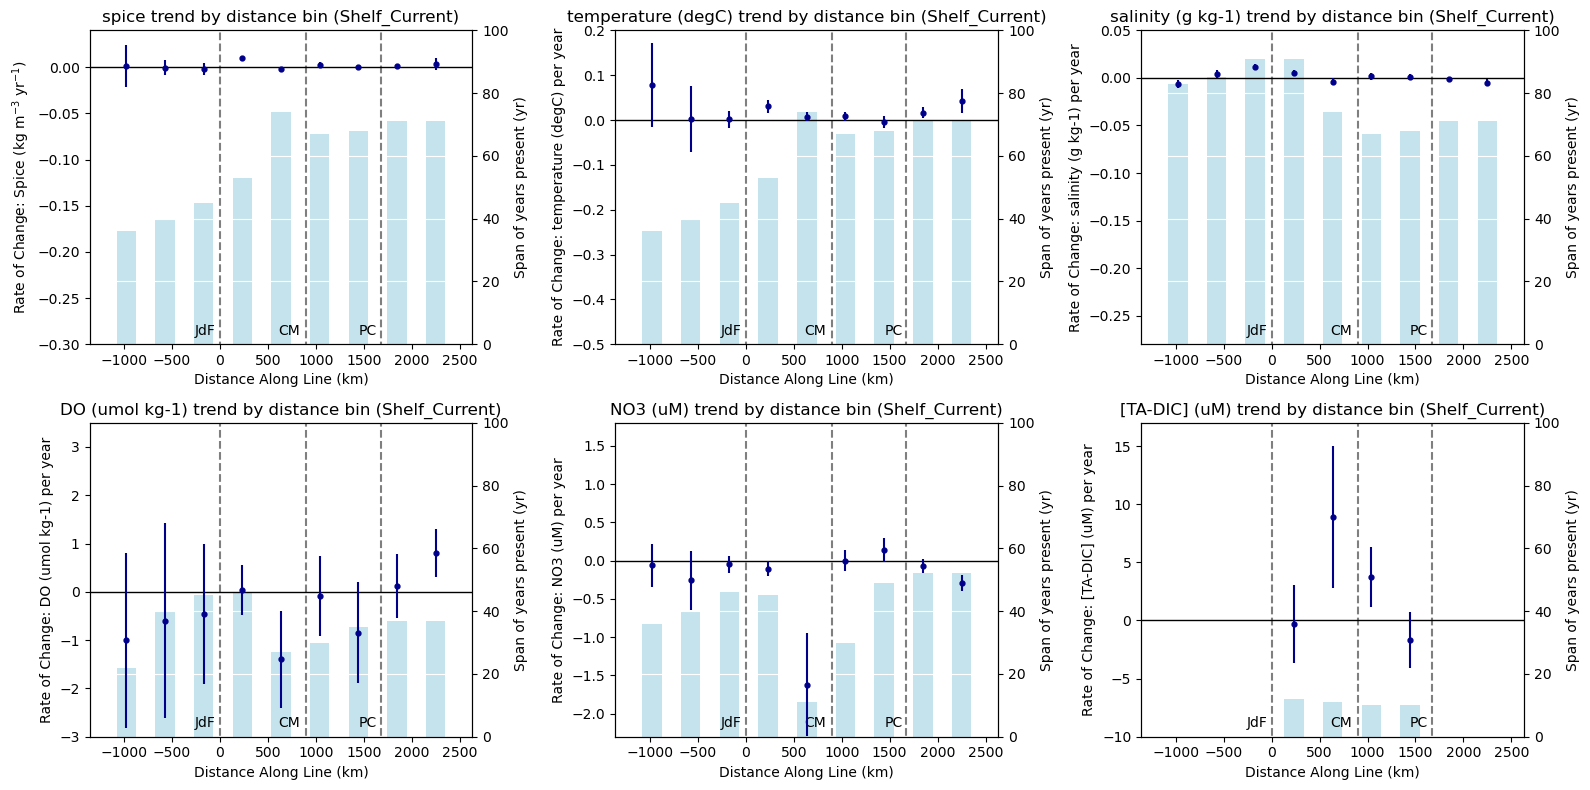

In [8]:
fig, ax = plt.subplots(2,3, figsize=(16, 8))
plot_ratediff_NS_CI('spice', 'Shelf_Current', (0,0))
plot_ratediff_NS_CI('temperature (degC)', 'Shelf_Current', (0,1))
plot_ratediff_NS_CI('salinity (g kg-1)', 'Shelf_Current', (0,2))
plot_ratediff_NS_CI('DO (umol kg-1)', 'Shelf_Current', (1,0))
plot_ratediff_NS_CI('NO3 (uM)', 'Shelf_Current', (1,1))
plot_ratediff_NS_CI('[TA-DIC] (uM)', 'Shelf_Current', (1,2))
plt.tight_layout()

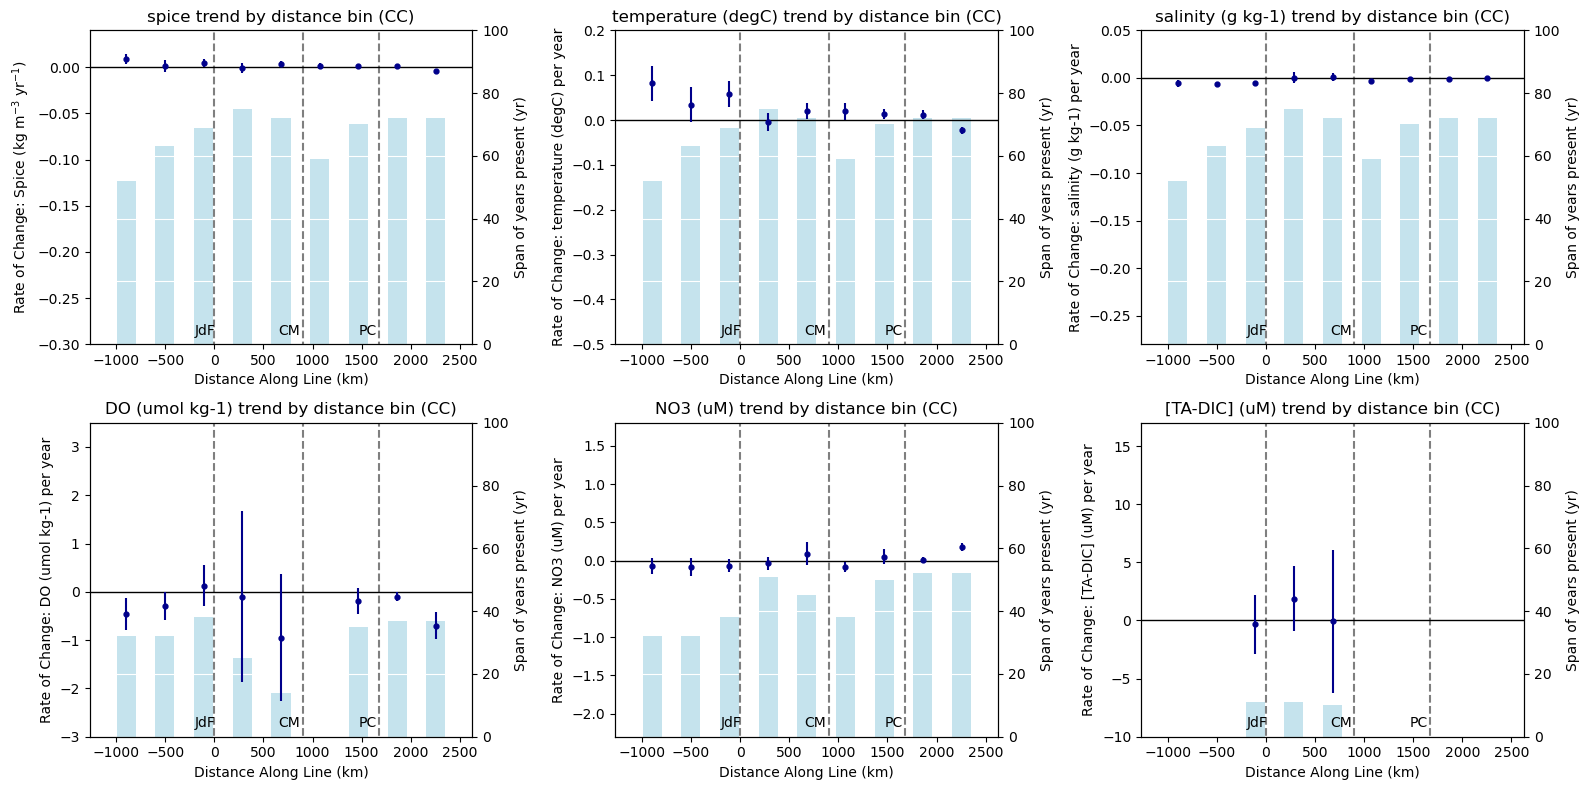

In [9]:
fig, ax = plt.subplots(2,3, figsize=(16, 8))
plot_ratediff_NS_CI('spice', 'CC', (0,0))
plot_ratediff_NS_CI('temperature (degC)', 'CC', (0,1))
plot_ratediff_NS_CI('salinity (g kg-1)', 'CC', (0,2))
plot_ratediff_NS_CI('DO (umol kg-1)', 'CC', (1,0))
plot_ratediff_NS_CI('NO3 (uM)', 'CC', (1,1))
plot_ratediff_NS_CI('[TA-DIC] (uM)', 'CC', (1,2))
plt.tight_layout()

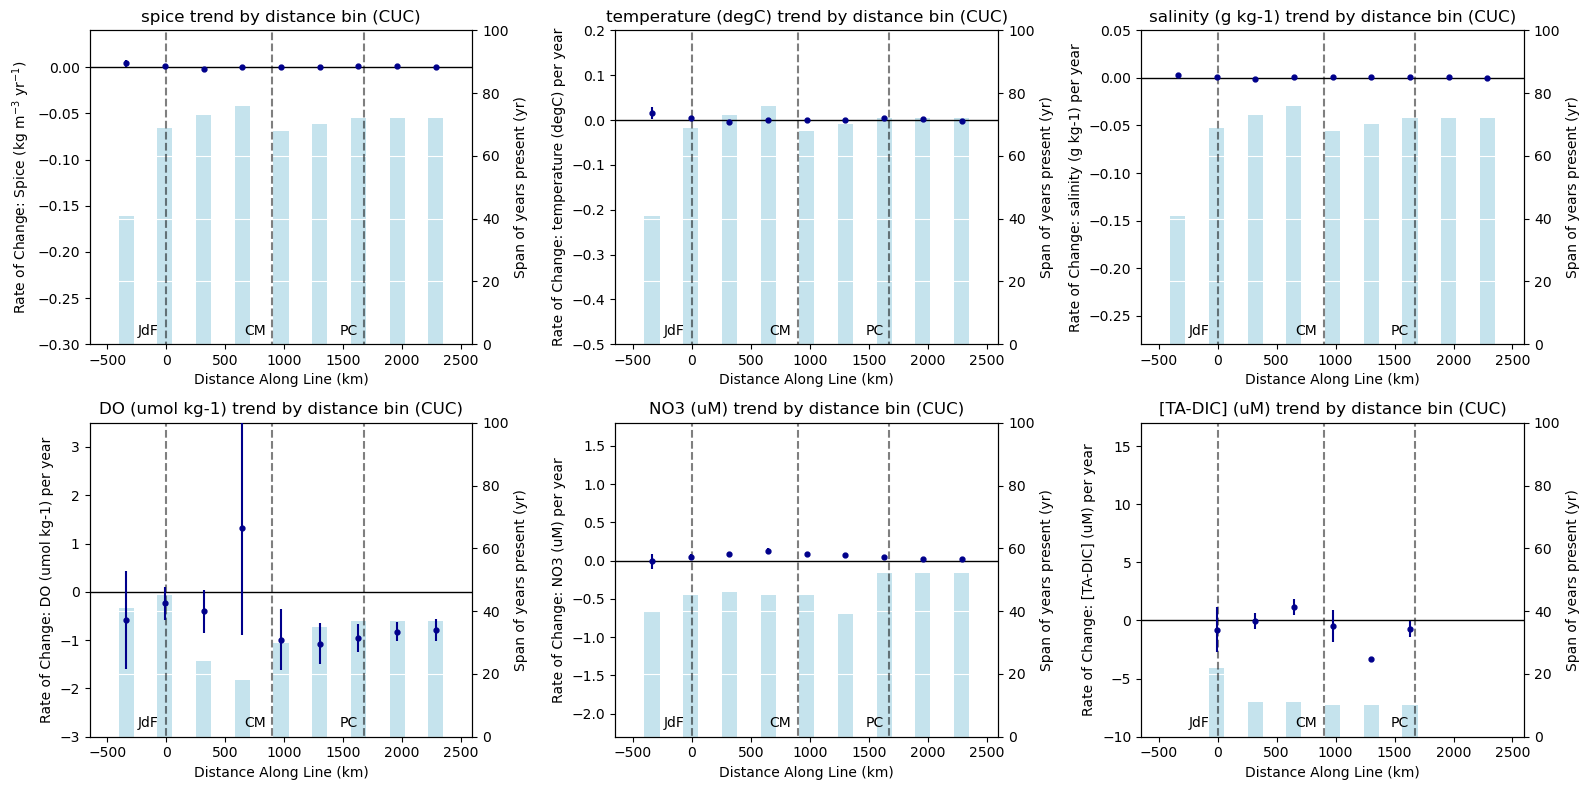

In [10]:
fig, ax = plt.subplots(2,3, figsize=(16, 8))
plot_ratediff_NS_CI('spice', 'CUC', (0,0))
plot_ratediff_NS_CI('temperature (degC)', 'CUC', (0,1))
plot_ratediff_NS_CI('salinity (g kg-1)', 'CUC', (0,2))
plot_ratediff_NS_CI('DO (umol kg-1)', 'CUC', (1,0))
plot_ratediff_NS_CI('NO3 (uM)', 'CUC', (1,1))
plot_ratediff_NS_CI('[TA-DIC] (uM)', 'CUC', (1,2))
plt.tight_layout()